In [95]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style="whitegrid")

In [28]:
data = pd.read_csv('cp113.csv', low_memory=False)
data.head(3)

,year,hhwt,statefip,countyfip,met2013,city,ownershp,hhincome,foodstmp,perwt,...,ind,classwkr,classwkrd,uhrswork,inctot,ftotinc,incwage,poverty,pwcounty,pwmet13
0,2007,71,California,37,"Los Angeles-Long Beach-Anaheim, CA",Not in identifiable city (or size group),Owned or being bought (loan),138800,No,69,...,7270,Works for wages,"Wage/salary, private",60,115000,138800,115000,501,37,"Los Angeles-Long Beach-Anaheim, CA"
1,2007,58,California,29,"Bakersfield, CA",Not in identifiable city (or size group),Rented,55200,No,72,...,170,Works for wages,"Wage/salary, private",40,13200,55200,13200,216,29,"Bakersfield, CA"
2,2007,52,California,29,"Bakersfield, CA",Not in identifiable city (or size group),Owned or being bought (loan),56000,No,57,...,5380,Works for wages,"Wage/salary, private",40,28000,56000,28000,409,29,"Bakersfield, CA"


### EDA: Wages by Industry and Occupation 

Let's try to look at how the top 10 industries have evolved over a decade from 2007 to 2017. 

In [70]:
wio = data[['year', 'occ', 'ind']]
wio.head(2)

,year,occ,ind
0,2007,2100,7270
1,2007,6050,170


In [77]:
top_5_occ_2007 = wio[wio['year'] == 2007].groupby('occ').count().sort_values('year', ascending = False).reset_index()['occ'].iloc[0:5]
len(wio[wio['occ'].isin(top_5_occ_2007)])/len(wio[wio['year'] == 2007])

0.236325

In [78]:
len(np.unique(wio[wio['year'] == 2007]['occ']))

468

In 2007, over 23% of people worked in one of the top-5 most popular occupations. Let's try to see if the top-5 occupations have changed over a span of 10 years. 

In [79]:
top_5_occ_2007

0    4760
1     430
2    5700
3    2310
4    4720
Name: occ, dtype: int64

In [80]:
len(wio[(wio['year'] == 2017) & (wio['occ'].isin(top_5_occ_2007))].groupby('occ').count().sort_values('year', ascending = False)['year'].values)

5

In [81]:
len(wio[(wio['year'] == 2007) & (wio['occ'].isin(top_5_occ_2007))].groupby('occ').count().sort_values('year', ascending = False)['year'].values)

5

In [83]:
frame = pd.DataFrame({'occupation':top_5_occ_2007.values, '2007 Count':wio[(wio['year'] == 2007) & (wio['occ'].isin(top_5_occ_2007))].groupby('occ').count().sort_values('year', ascending = False)['year'].values, '2017 Count':wio[(wio['year'] == 2017) & (wio['occ'].isin(top_5_occ_2007))].groupby('occ').count().sort_values('year', ascending = False)['year'].values})
frame['Change (2017 - 2007)'] = frame['2017 Count'] - frame['2007 Count']
frame

,occupation,2007 Count,2017 Count,Change (2017 - 2007)
0,4760,4016,5109,1093
1,430,3925,3647,-278
2,5700,3827,3468,-359
3,2310,3827,3444,-383
4,4720,3547,3002,-545


In [84]:
net_change = np.sum(frame['Change (2017 - 2007)'])
net_change

-472

Overall, there has been a decrease in participation in the top-5 occupations from 2007 to 2017. Let's visualize this change. 

In [89]:
frame.set_index('occupation')['2007 Count']

occupation
4760    4016
430     3925
5700    3827
2310    3827
4720    3547
Name: 2007 Count, dtype: int64

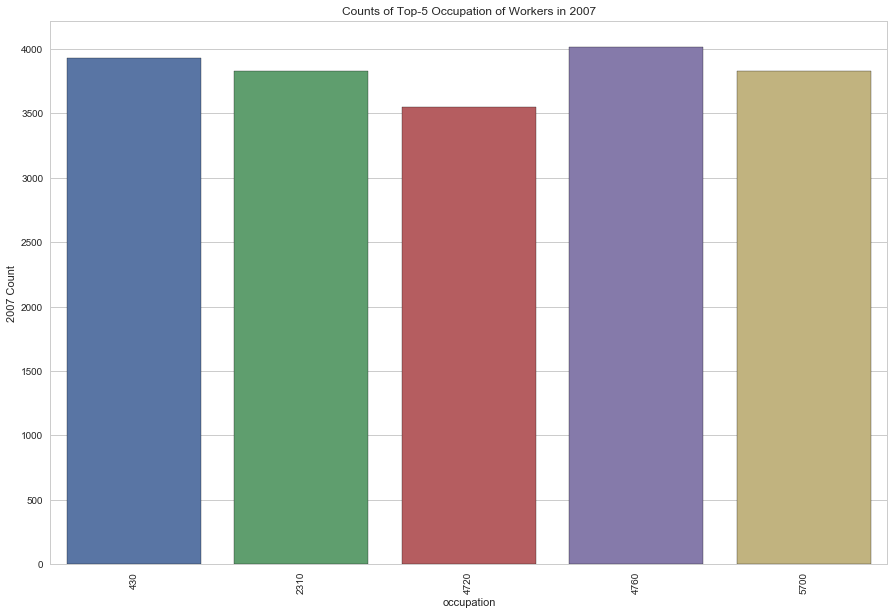

In [96]:
plt.figure(figsize=(15,10));
ax = sns.barplot(x = 'occupation', y = '2007 Count', data = frame)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts of Top-5 Occupation of Workers in 2007');

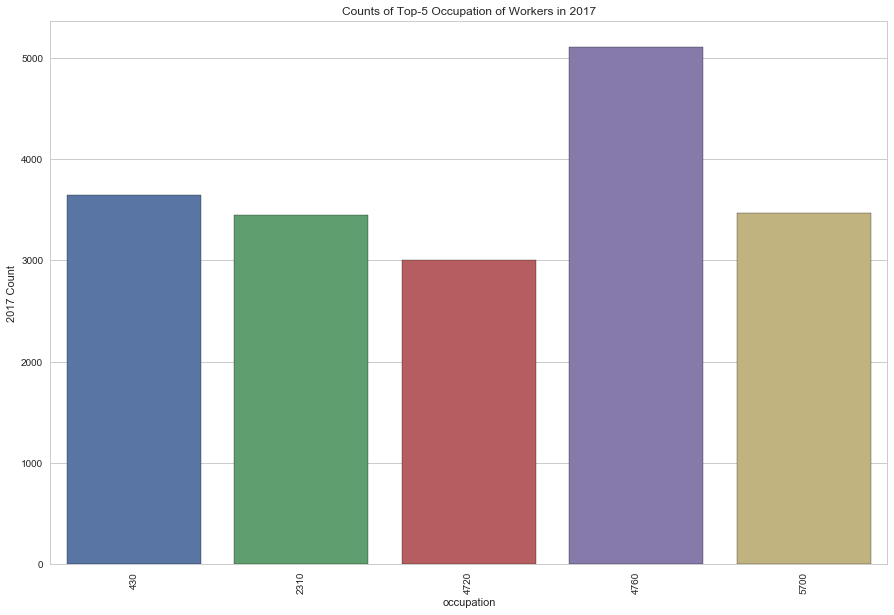

In [97]:
plt.figure(figsize=(15,10));
ax = sns.barplot(x = 'occupation', y = '2017 Count', data = frame)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts of Top-5 Occupation of Workers in 2017');

Use the data dictionary to see what specific occupations were affected. Speculate on reasons why this may have occured. 

### EDA: Employment 

Let's now turn our attention to employment over a span of 10 years. 

In [99]:
data.columns

Index(['year', 'hhwt', 'statefip', 'countyfip', 'met2013', 'city', 'ownershp',
       'hhincome', 'foodstmp', 'perwt', 'age', 'race', 'hispan', 'educ',
       'empstat', 'empstatd', 'labforce', 'occ', 'ind', 'classwkr',
       'classwkrd', 'uhrswork', 'inctot', 'ftotinc', 'incwage', 'poverty',
       'pwcounty', 'pwmet13'],
      dtype='object')

In [104]:
[1] * 2

[1, 1]

In [109]:
first = data[['year', 'empstat']]
first['tally'] = [1] * len(first)
grouped = first.groupby(['year', 'empstat']).count()
grouped

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


tally
year empstat                   
2007 Employed            141009
     Not in labor force   12542
     Unemployed            6449
2017 Employed            147090
     Not in labor force    8367
     Unemployed            4543

In [117]:
change_in_num_employed = grouped['tally'][0] - grouped['tally'][3]
change_in_num_employed

-6081

In [119]:
change_in_num_not_in_labor_force = grouped['tally'][1] - grouped['tally'][4]
change_in_num_not_in_labor_force

4175

In [120]:
change_in_num_unemployed = grouped['tally'][2] - grouped['tally'][5]
change_in_num_unemployed

1906

Interpret these numbers? Why might they have arisen?